# **\[SOLAR_A\]** tgcn

JiyunLim  
2023-08-31

## TGCN

In [35]:
%run test_model/tgcn

In [2]:
# read dataframe 
df = pd.read_csv('data_eng_230710.csv')

# make y, y_upper, y_period, time, regions 
y = df.loc[:,'Bukchoncheon':'Gyeongju-si'].to_numpy()
yU = df.loc[:,'Bukchoncheon_Upper':'Gyeongju-si_Upper'].to_numpy()
yP = np.divide(y, yU+1e-10)

t = df.loc[:,'date']
regions = list(df.loc[:, 'Bukchoncheon':'Gyeongju-si'].columns)

In [3]:
# global parameters
TRAIN_RATIO = 0.8
T, N = len(t), len(regions)
LEN_TEST = int(np.floor(T*(1-TRAIN_RATIO)))
LEN_TR = T - LEN_TEST

In [120]:
# create lrnr object
lrnr = RGCN_Learner()
# load data
lrnr.lags = 24
lrnr.train_ratio = 0.8
lrnr.load(y)
# construct network
lrnr.nof_filters = 16
lrnr.model = T_GCN(node_features=lrnr.lags, filters=lrnr.nof_filters).to(device)
lrnr.optimizer = torch.optim.Adam(lrnr.model.parameters(), lr=10/1000)
# learn
lrnr.get_batches(128)
for e in range(10):
    lrnr.learn()

epoch=1  loss=0.459800963290035773451233        
epoch=2  loss=0.267419864423573415626526        
epoch=3  loss=0.2269324166700244792434692   
epoch=4  loss=0.1973466631025076964801788       
epoch=5  loss=0.1884528286755085379211426       
epoch=6  loss=0.1855822680518031237869263       
epoch=7  loss=0.1845720838755369288941956       
epoch=8  loss=0.1841127648949623971427917       
epoch=9  loss=0.1836798340082168660175323       
epoch=10     loss=0.183260587975382874947357        

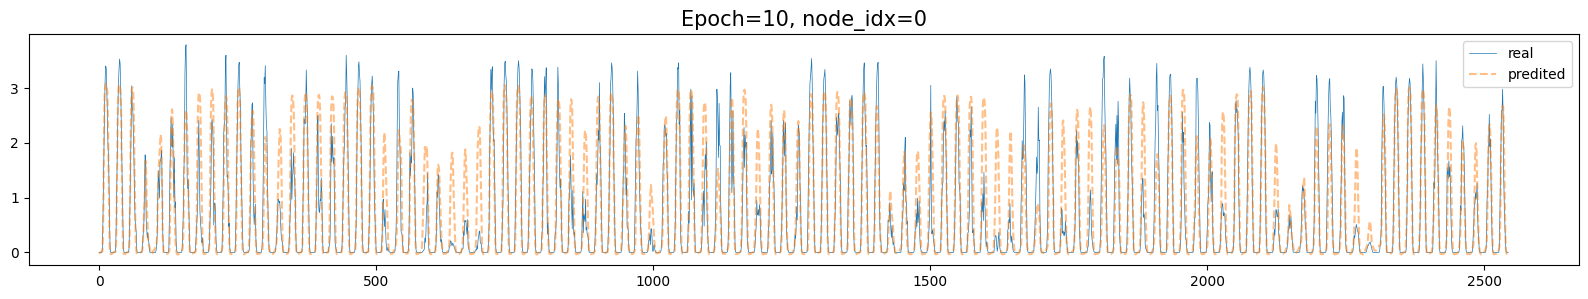

In [121]:
lrnr.figs[-1]

In [122]:
yhat = np.concatenate([np.array([list(lrnr.yhat[0])]*lrnr.lags),lrnr.yhat],axis=0)
yhat[yhat<0] = 0

In [123]:
((y - yhat)[LEN_TR:,:]**2).mean()

In [124]:
lrnr1 = RGCN_Learner()
lrnr1.lags = 1
lrnr1.train_ratio = 0.8
lrnr1.load(yU)

lrnr1.nof_filters = 16
lrnr1.model = T_GCN(node_features=lrnr1.lags, filters=lrnr1.nof_filters).to(device)
lrnr1.optimizer = torch.optim.Adam(lrnr1.model.parameters(), lr=10/1000)

lrnr1.get_batches(24)
for e in range(5):
    lrnr1.learn()

epoch=1  loss=1.47735909129991086194153     
epoch=2  loss=0.547880996625090771891785    
epoch=3  loss=0.32673339693005693911316     
epoch=4  loss=0.276032996905404458537598        
epoch=5  loss=0.262759639859892611976624        

In [125]:
yUhat = np.concatenate([np.array([list(lrnr1.yhat[0])]*lrnr1.lags),lrnr1.yhat],axis=0)
yU_mse = np.mean((yU - yUhat)[LEN_TR:,:]**2)
yU_mse

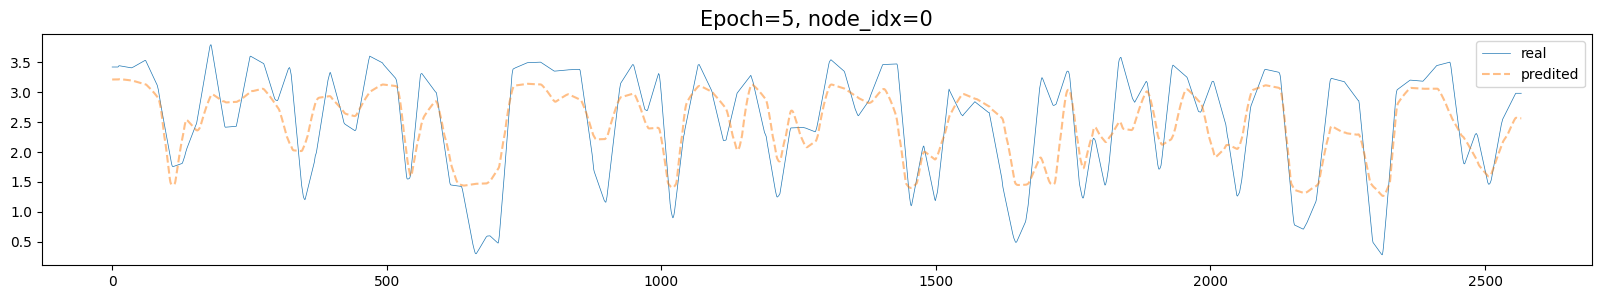

In [126]:
lrnr1.figs[-1]

In [127]:
lrnr2 = RGCN_Learner()
lrnr2.lags = 24
lrnr2.train_ratio = 0.8
lrnr2.load(yP)

lrnr2.nof_filters = 16
lrnr2.model = T_GCN(node_features=lrnr2.lags, filters=lrnr2.nof_filters).to(device)
lrnr2.optimizer = torch.optim.Adam(lrnr2.model.parameters(), lr=10/1000)

lrnr2.get_batches(128)
for e in range(10):
    lrnr2.learn()

epoch=1  loss=0.1680073747411370317943573       
epoch=2  loss=0.0304657372180372486839943       
epoch=3  loss=0.02146620448911562678684998  
epoch=4  loss=0.02043941686861217806135178  
epoch=5  loss=0.01989455259172246341737747  
epoch=6  loss=0.01953353383578365169229507  
epoch=7  loss=0.01911501237191260472164154  
epoch=8  loss=0.01863878220319748602602005  
epoch=9  loss=0.0181151960860006534384823       
epoch=10     loss=0.017618110170587897494747        

In [128]:
yPhat = np.concatenate([np.array([list(lrnr2.yhat[0])]*lrnr2.lags),lrnr2.yhat],axis=0)
yPhat[yPhat<0] = 0

In [129]:
yP_mse = np.mean((yP - yPhat)**2)
yP_mse

In [130]:
yP_mse = np.mean((yP - yPhat)**2)
yP_mse

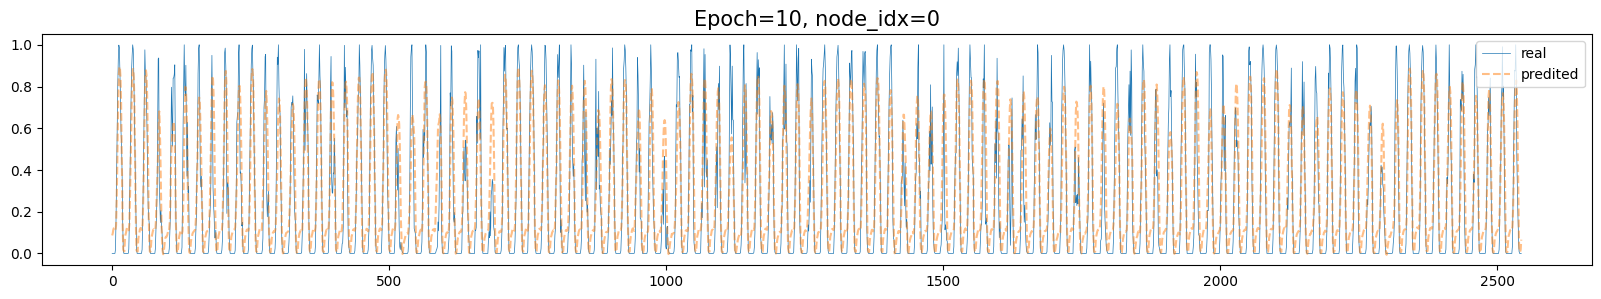

In [131]:
lrnr2.figs[-1]

In [132]:
classic = ((y - yhat)[LEN_TR:,:]**2).mean()
proposed = ((y - yUhat*yPhat)[LEN_TR:,:]**2).mean()
print('classic(mse)', round(classic,4))
print('proposed(mse)', round(proposed,4))

classic(mse) 0.1756
proposed(mse) 0.1656

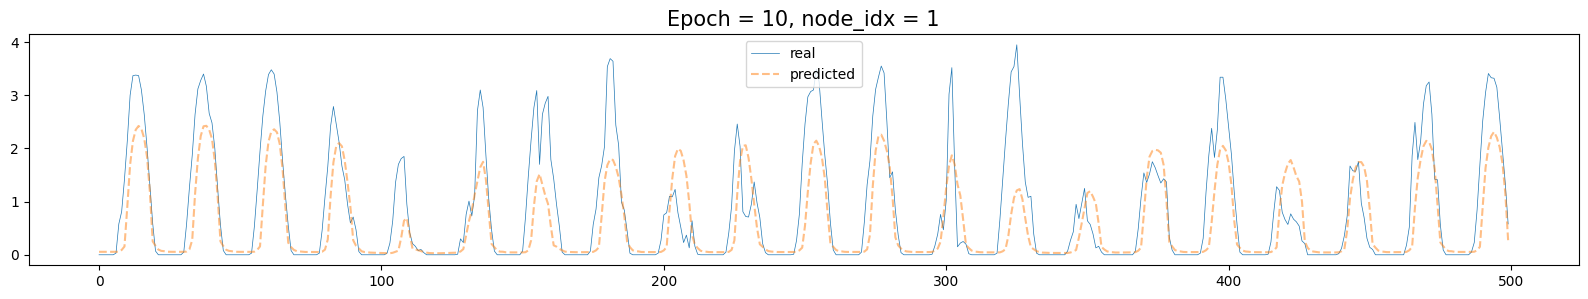

In [111]:
rslt_plot(lrnr2, y, yUhat*yPhat, 500, 1)

In [133]:
%run test_model/tgcn

In [135]:
s1 = Simulator()

In [ ]:
s1.simulate(
    n_iteration = 20,
    lags = [4, 8, 12, 24],
    filters = [4, 8, 12, 16, 32],
    epoch = [10],
    Model = T_GCN,
    lr = 10/1000
)

epoch=1  loss=1.2821705253685223438477  9       

In [147]:
import os
fnames = ['./test/'+l for l in os.listdir('./test') if l[0] != '.']
fnames 

In [148]:
import os

def NumIter(model_name, fnames):
    count = 0  # 'gconvlstm'이 포함된 파일 개수를 저장할 변수
    # 디렉토리 내의 모든 파일 검사
    for file_path in fnames:
        file_name = os.path.basename(file_path)
        if model_name in file_name:
            count += 1

    print(f"{model_name}이 포함된 파일 개수: {count}")

In [149]:
NumIter('gconvgru', fnames)
NumIter('dcrnn', fnames)
NumIter('gconvlstm', fnames)
NumIter('lrgcn', fnames)
NumIter('gclstm', fnames)
NumIter('tgcn', fnames)

gconvgru이 포함된 파일 개수: 50
dcrnn이 포함된 파일 개수: 50
gconvlstm이 포함된 파일 개수: 50
lrgcn이 포함된 파일 개수: 50
gclstm이 포함된 파일 개수: 50
tgcn이 포함된 파일 개수: 30

In [150]:
df = pd.concat([pd.read_csv(fname) for fname in fnames]).reset_index(drop=True)

In [151]:
def summary_table(df):
    model_name = input("모델명을 입력하세요: ")
    df = df[df['model']== model_name]
    df_summary = df.groupby(by=['model','method','lags','nof_filters']).agg({'mse':[np.mean]}).reset_index()
    df_classic = df_summary[df_summary['method']=='classic']
    df_proposed = df_summary[df_summary['method']=='proposed'].reset_index()[['method','mse']]
    df_compare = pd.concat([df_classic, df_proposed], axis=1)
    return df_compare

In [152]:
summary_table(df)

In [31]:
summary_table(df)

In [32]:
summary_table(df)

In [33]:
summary_table(df)

In [34]:
summary_table(df)